In [4]:
import numpy as np
import pandas as pd 

In [5]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Декодирование отзыва обратно в текст

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [8]:
# Кодирование последовательностей целых чисел в бинарную матрицу

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
# Построение модели

from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2914 - loss: 3.3059 - val_accuracy: 0.6130 - val_loss: 1.9306
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6369 - loss: 1.7361 - val_accuracy: 0.6860 - val_loss: 1.4033
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7366 - loss: 1.2581 - val_accuracy: 0.7480 - val_loss: 1.2080
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7870 - loss: 0.9990 - val_accuracy: 0.7600 - val_loss: 1.1127
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8243 - loss: 0.8335 - val_accuracy: 0.7840 - val_loss: 1.0209
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8586 - loss: 0.6802 - val_accuracy: 0.8040 - val_loss: 0.9635
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8833 - loss: 0.5506 - val_accuracy: 0.8110 - val_loss: 0.9170
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9079 - loss: 0.4574 - val_accuracy: 0.8080 - v

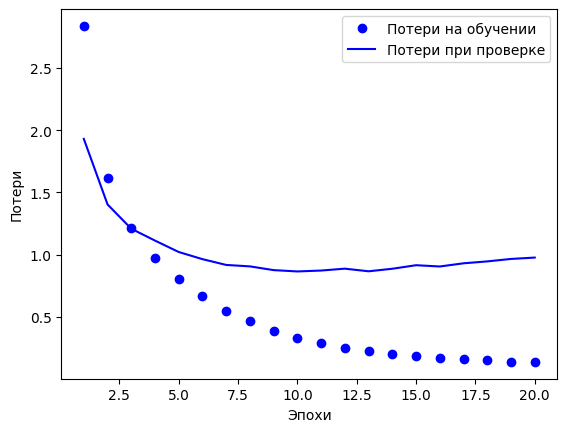

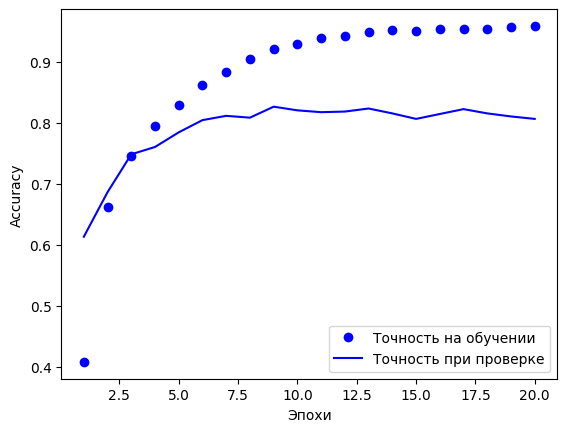

In [16]:
import matplotlib.pyplot as plt

hist_dict = history.history
loss_val = hist_dict['loss']
val_loss_values = hist_dict['val_loss']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, loss_val, 'bo', label='Потери на обучении')
plt.plot(epochs, val_loss_values, 'b', label='Потери при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.figure()
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.2807 - loss: 3.5254 - val_accuracy: 0.5260 - val_loss: 2.2176
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5263 - loss: 2.0031 - val_accuracy: 0.6270 - val_loss: 1.5497
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6576 - loss: 1.4680 - val_accuracy: 0.7030 - val_loss: 1.3091
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7256 - loss: 1.1904 - val_accuracy: 0.7370 - val_loss: 1.1731
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7641 - loss: 0.9735 - val_accuracy: 0.7580 - val_loss: 1.1030
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8043 - loss: 0.8075 - val_accuracy: 0.7770 - val_loss: 1.0540
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8425 - loss: 0.6502 - val_accuracy: 0.7910 - val_loss: 1.0218
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8766 - loss: 0.5247 - val_accuracy: 0.8130 - v

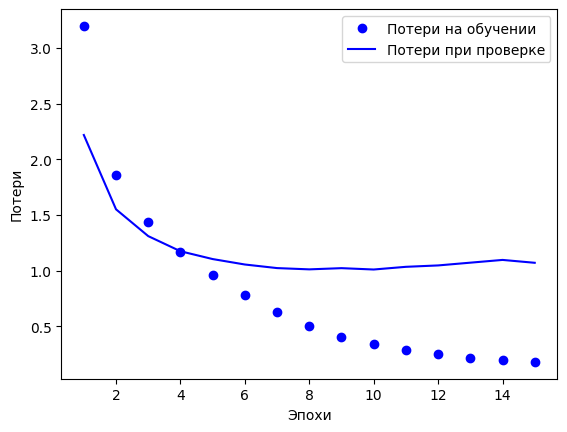

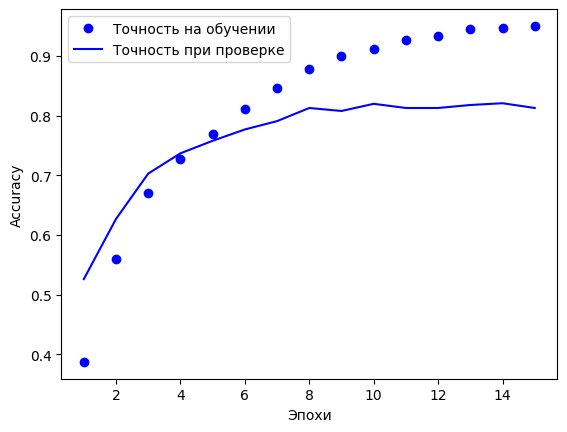

In [42]:
import matplotlib.pyplot as plt

hist_dict = history.history
loss_val = hist_dict['loss']
val_loss_values = hist_dict['val_loss']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, loss_val, 'bo', label='Потери на обучении')
plt.plot(epochs, val_loss_values, 'b', label='Потери при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.figure()
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3332 - loss: 3.3708
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6709 - loss: 1.6112
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7779 - loss: 1.0649
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8573 - loss: 0.7104
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9048 - loss: 0.4711
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9307 - loss: 0.3315
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9466 - loss: 0.2374
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9514 - loss: 0.1978
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9578 - loss: 0.1565
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8007 - loss: 0.9521


## Результат/модель
loss = 0.8982, accuracy = 0.8083

-------------------------------------------------------

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

## Результат/модель
loss = 0.8980, accuracy = 0.8134

-------------------------------------------------------

model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=512)